In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
import Polynome2p1 as Poly
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


## Initialisation

In [2]:
def test_init(p):
    X = Poly.init_X(p)
    plt.plot(X[:p+1],np.ones(len(X[:p+1])),'ob')
    plt.plot(X[p+1:],np.ones(len(X[p+1:])),'or')

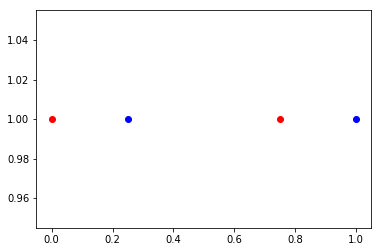

In [3]:
p = 1
test_init(p)

## Operateur S

In [4]:
def test_S(a):
    print(a)
    Speps = Poly.S(4,0.1,a)
    print(Speps)

    plt.plot(Speps[:4],np.ones(4),'or')
    plt.plot(Speps[4:],np.ones(4),'ob')

[0.1, 0.35, 0.5, 0.8, 0.07, 0.39, 0.65, 0.85]
[0.17391304 0.39130435 0.56521739 0.82608696 0.16949153 0.44067797
 0.66101695 0.83050847]


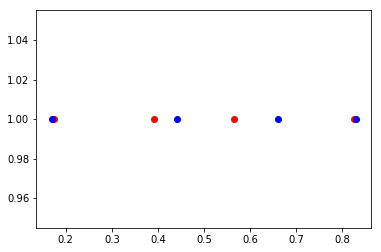

In [5]:
a = [0.1,0.35,0.5,0.8,0.07,0.39,0.65,0.85]
test_S(a)

## Erreur par les trapèzes

In [6]:
def test_erreurs_trapezes(fx,attendu,x=None):
    print("Obtenu : ", Poly.trapezes(fx,x))
    print("Attendu : ",attendu)

x = np.linspace(0,1,5)
fx = np.array([0,1,3,3,2])
attendu = 0.25*0.5 + 0.25*2 + 3*0.25 + 0.25*2.5
test_erreurs_trapezes(fx,attendu)

Obtenu :  2.0
Attendu :  2.0


# Algorithme

In [7]:
def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly.approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, Poly.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx,nb_iter

### Test sur des fonctions classiques 

[0.0009395973176776748, 3.9051794368017474e-05, 2.036602702915469e-06, 1.1935670499799538e-07, 7.292115245426434e-09]


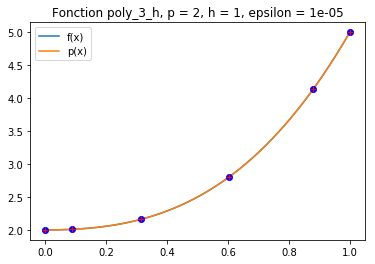

Nombre d'iterations : 5
Norme de l'erreur : 
    n2 = 3.028091764320942e-05
    ninf =  5.841799621819632e-08
    trapezes =  2.175678815254239e-08 

[0.0009210951855020662, 3.3266033653105215e-05, 1.3711894650869074e-06, 6.350134092741608e-08, 3.286692893455411e-09]


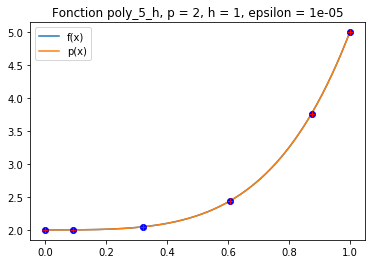

Nombre d'iterations : 5
Norme de l'erreur : 
    n2 = 1.3093627988680178e-05
    ninf =  2.3966200135561166e-08
    trapezes =  9.670627198494117e-09 

[0.00019043889303475828, 1.6351455312614498e-06, 1.9580912968591834e-08, 2.542003896673685e-10]


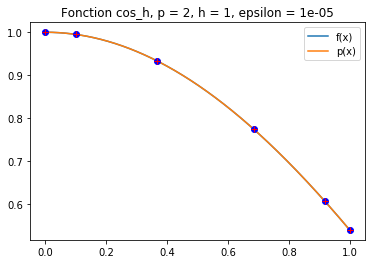

Nombre d'iterations : 4
Norme de l'erreur : 
    n2 = 0.0007287147796958515
    ninf =  1.2570706757752959e-06
    trapezes =  6.213508263213111e-07 

[0.00026103778667736115, 4.60533607283444e-06, 1.005704308240716e-07, 2.3337207620475286e-09]


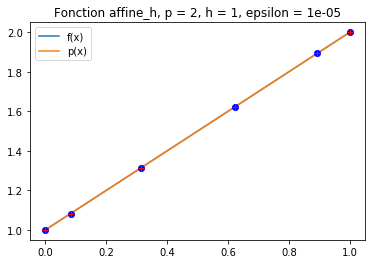

Nombre d'iterations : 4
Norme de l'erreur : 
    n2 = 4.415744812971021e-06
    ninf =  8.498967751791042e-09
    trapezes =  3.369965824830403e-09 



In [8]:
h = 1
p = 2
epsilon=1e-5
fonctions_test = FT.fonctions("Sans Arg","Classic")

for fonctions in fonctions_test : 
    px,fx,nb_iter = test_approx(p,fonctions,h,epsilon,affichage=1,s=1)
    print("Nombre d'iterations :", nb_iter)
    print("Norme de l'erreur : ")
    print("    n2 =", npl.norm(px-fx))
    print("    ninf = ", npl.norm(px-fx,np.inf))
    print("    trapezes = ", Poly.trapezes(px-fx),"\n")

[0.0013918645012070332, 9.660403557287807e-05, 8.19626575855715e-06, 7.791137032595867e-07, 7.856644221059787e-08, 8.145913751011328e-09]


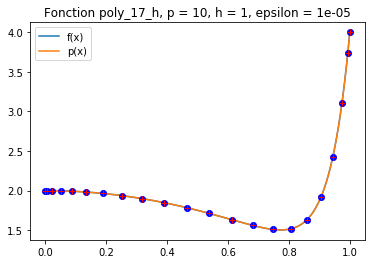

Nombre d'iterations : 6
Norme de l'erreur : 
    n2 = 1.7777395674597476e-05
    ninf =  7.072433749755191e-08
    trapezes =  8.825180921573776e-09 

[0.00020238732948096833, 5.591190337684237e-06, 1.9543095971635824e-07, 7.616306636034124e-09]


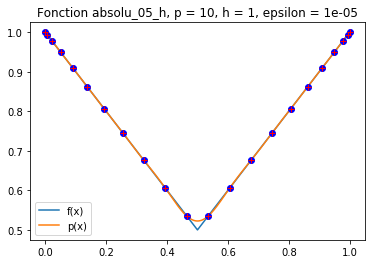

Nombre d'iterations : 4
Norme de l'erreur : 
    n2 = 3.1888039113879487
    ninf =  0.02253667463647213
    trapezes =  0.0012482217173651145 

[0.01991864616371818, 0.004374251854053648, 0.0011658782723689243, 0.0003466944810281727, 0.0001105237644001116, 3.6963170408781505e-05, 1.2801106412330221e-05, 4.552499167542279e-06, 1.653074881058731e-06, 6.103903097286688e-07, 2.2850422772893477e-07, 8.653042969593016e-08, 3.3088046760244045e-08, 1.2758564875936785e-08, 4.95542366587646e-09]


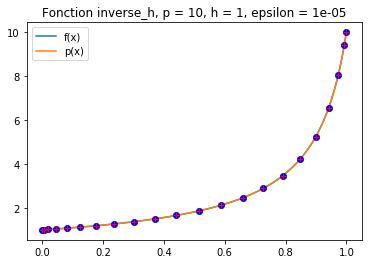

Nombre d'iterations : 15
Norme de l'erreur : 
    n2 = 0.004034733421788934
    ninf =  1.4789580345286879e-05
    trapezes =  2.5499947273428978e-06 

[0.04536044582457466, 0.012840638082055307, 0.004502459339242443, 0.0017833738888377074, 0.0007588847650493038, 0.00033819488454060005, 0.00015583556700413532, 7.371748533489151e-05, 3.562332964237133e-05, 1.7516687407108997e-05, 8.736572431497254e-06, 4.408885285696279e-06, 2.247083835381908e-06, 1.1551428116757082e-06, 5.983485156507998e-07, 3.1206597721133893e-07, 1.6377092973740232e-07, 8.643235537877854e-08, 4.5848879775221726e-08, 2.4432374992752922e-08, 1.3072766796490434e-08, 7.019820849929891e-09]


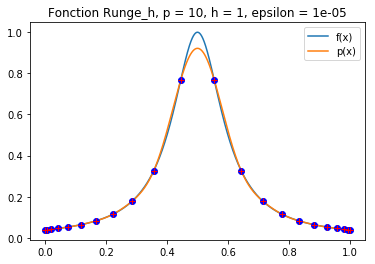

Nombre d'iterations : 22
Norme de l'erreur : 
    n2 = 18.763507905905485
    ninf =  0.07821372809084193
    trapezes =  0.008241301555051463 

[0.12634783219727208, 0.04927402772771318, 0.02194645277429365, 0.010788535055713065, 0.005693644032978604, 0.0031718948313889665, 0.0018479690029827535, 0.001119824555267057, 0.0007029248248405092, 0.0004552031046787636, 0.00030276605514146544, 0.00020587558424905734, 0.00014249269233168298, 0.00010000425532877787, 7.094974511180975e-05, 5.076599306213524e-05, 3.6571043878646206e-05, 2.649163788277723e-05, 1.9280107102249702e-05, 1.4088821351693889e-05, 1.0332828184231469e-05, 7.603478221516489e-06, 5.612544922678842e-06, 4.155196770786405e-06, 3.084980039120541e-06, 2.2966535405938374e-06, 1.7142673334541192e-06, 1.282804212952832e-06, 9.622749253638905e-07, 7.235214937535488e-07, 5.45219725679054e-07, 4.1172930731189857e-07, 3.1154624864513306e-07, 2.3618532482702564e-07, 1.7937064067775134e-07, 1.3644771578923256e-07, 1.0395530005101105e-0

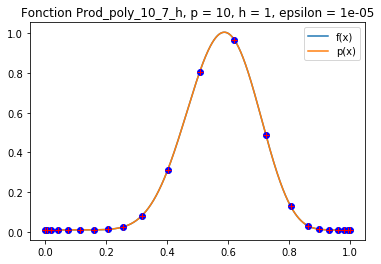

Nombre d'iterations : 46
Norme de l'erreur : 
    n2 = 2.4294267952496906e-05
    ninf =  7.268626889267438e-08
    trapezes =  1.5320669055004687e-08 

[0.09201257689074209, 0.04406048385923221, 0.02521236431209994, 0.016062043354219197, 0.01098993524617217, 0.007911607988458007, 0.005915896648301251, 0.00455570252524578, 0.003591806752080699, 0.0028871903977775986, 0.0023589070318411416, 0.001954398972386896, 0.0016390765929030643, 0.0013894427410261364, 0.0011891046984703376, 0.0010263650410798904, 0.0008927138562305764, 0.0007818555629940629, 0.0006890637328739109, 0.0006107432763877371, 0.000544127247701655, 0.0004870631077751034, 0.0004378596747728732, 0.0003951760005355582, 0.0003579396825915502, 0.0003252861404508694, 0.0002965130150477312, 0.00027104560380202794, 0.0002484104328348835, 0.00022821488646344604, 0.00021013138538835183, 0.0001938850086194278, 0.0001792437425510357, 0.00016601074870344044, 0.00015401819321886586, 0.00014312229253516265, 0.0001331993120802961, 0.000

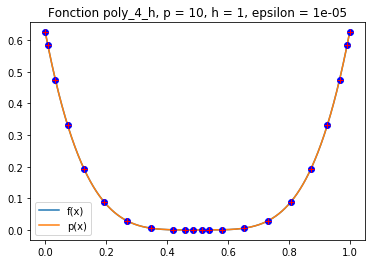

Nombre d'iterations : 100
Norme de l'erreur : 
    n2 = 0.06311451178649137
    ninf =  0.00014313864679338373
    trapezes =  4.737716020590205e-05 

[0.0012478928810703864, 4.7610629418814764e-05, 3.180792663129245e-06, 2.459210793242454e-07, 1.7887860104429626e-08, 1.2154799187419252e-09]


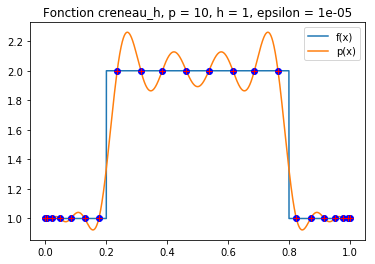

Nombre d'iterations : 6
Norme de l'erreur : 
    n2 = 143.03363677040485
    ninf =  0.6647640553102774
    trapezes =  0.09486383865595498 

[0.00014335918706854403, 2.7980271374702013e-06, 7.175312291114277e-08, 2.1093040815966275e-09]


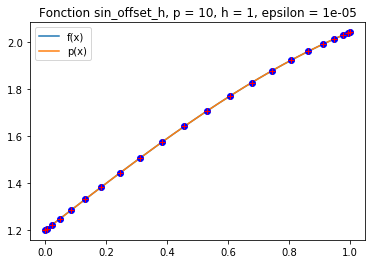

Nombre d'iterations : 4
Norme de l'erreur : 
    n2 = 3.5245840759884786e-06
    ninf =  9.64392743441067e-09
    trapezes =  2.151843735326552e-09 

[0.18099178158448231, 0.09178106971624014, 0.053651673678679124, 0.03453361304364164, 0.023824481166549526, 0.01730770108759896, 0.013079862508331897, 0.010194755307437155, 0.00814433454660775, 0.006638059650430902, 0.005500827008909232, 0.004622335811961793, 0.00393044052365542, 0.0033764006870766823, 0.0029263522350795905, 0.0025561848955792557, 0.00224836071110986, 0.0019898786949746096, 0.0017709378965952123, 0.0015840382243629363, 0.0014233627031667554, 0.0012843448631361693, 0.0011633604693475678, 0.001057504359380853, 0.0009644265502140114, 0.0008822102786809524, 0.0008092801443447914, 0.0007443321524965139, 0.0006862798876797038, 0.000634212704453097, 0.0005873629661675701, 0.0005450801634292115, 0.0005068103116199926, 0.0004720794339671875, 0.00044048023181005817, 0.0004116612598942957, 0.00038531808438467725, 0.00036118602056734

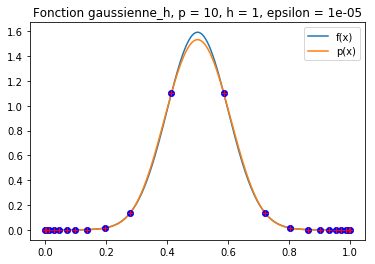

Nombre d'iterations : 100
Norme de l'erreur : 
    n2 = 18.334650588433824
    ninf =  0.059665224906734204
    trapezes =  0.00967592027842639 



Polynome2p1.ipynb:31: RuntimeWarning: divide by zero encountered in double_scalars
  "# Polynome de degré $n = 2p + 1$ "


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


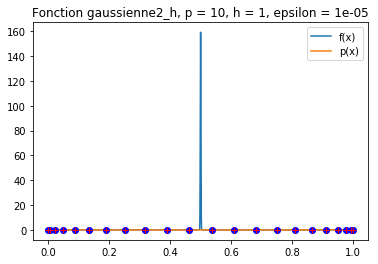

Nombre d'iterations : 100
Norme de l'erreur : 
    n2 = 6700.505395308189
    ninf =  159.15493309189534
    trapezes =  0.3989520432906283 



In [9]:
h = 1
p = 10
epsilon=1e-5
fonctions_test = FT.fonctions("Sans Arg")

for fonctions in fonctions_test : 
    px,fx,nb_iter = test_approx(p,fonctions,h,epsilon,affichage=1,s=1)
    print("Nombre d'iterations :", nb_iter)
    print("Norme de l'erreur : ")
    print("    n2 =", npl.norm(px-fx))
    print("    ninf = ", npl.norm(px-fx,np.inf))
    print("    trapezes = ", Poly.trapezes(px-fx),"\n")

### Erreur algo Newton

[0.0010215037494299547, 5.703792263013458e-05, 3.998050359769675e-06, 3.2766927902465814e-07, 2.9270791184246138e-08, 2.7087147403751134e-09]


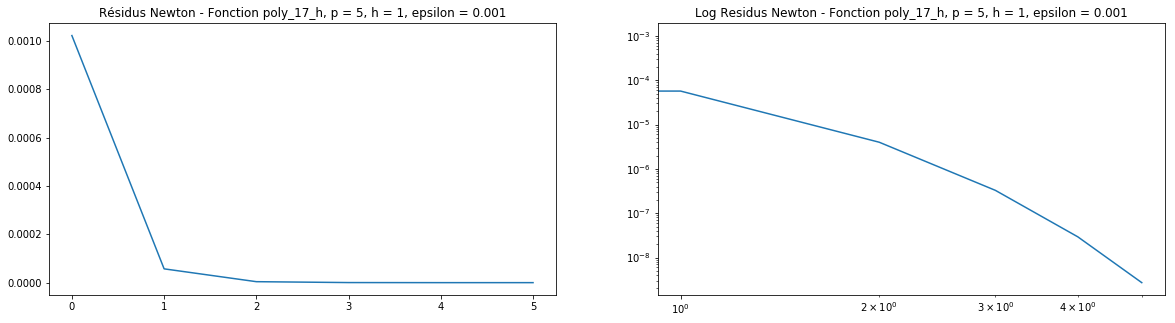

[0.00017877050953288536, 4.57118944813117e-06, 1.4397321649330262e-07, 4.7761167508558185e-09]


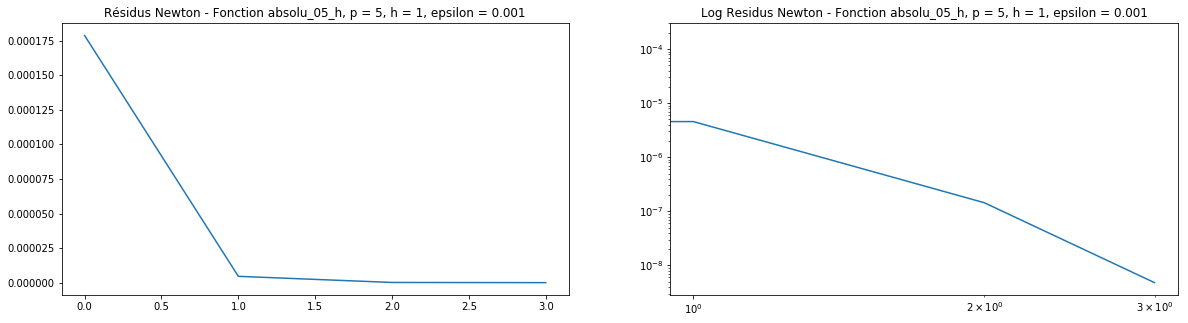

[0.016815369418229652, 0.0033858590184727808, 0.000801193117850702, 0.00020855738227680621, 5.797375365736765e-05, 1.6905660822751413e-05, 5.111704855968987e-06, 1.5896718504654196e-06, 5.054430275799715e-07, 1.6358168907738228e-07, 5.371229547031245e-08, 1.785023475523266e-08, 5.993227326945773e-09]


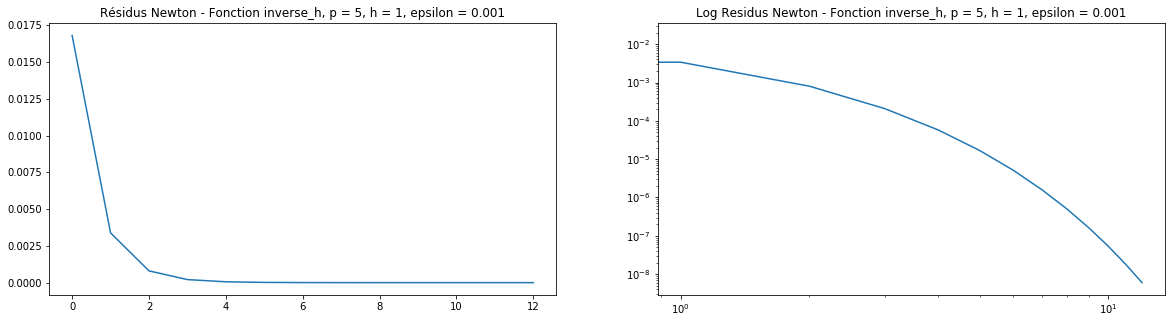

[0.03249729173171737, 0.0068011482496688645, 0.0020017092533099554, 0.000705701161186865, 0.00026218595291970214, 9.891617718861133e-05, 3.761945038543093e-05, 1.4425333265770605e-05, 5.591906295095161e-06, 2.1994846001367745e-06, 8.812333451859166e-07, 3.6075988513192836e-07, 1.5112181069615983e-07, 6.473241269602092e-08, 2.828120359406012e-08, 1.2557020151384385e-08, 5.644622994738667e-09]


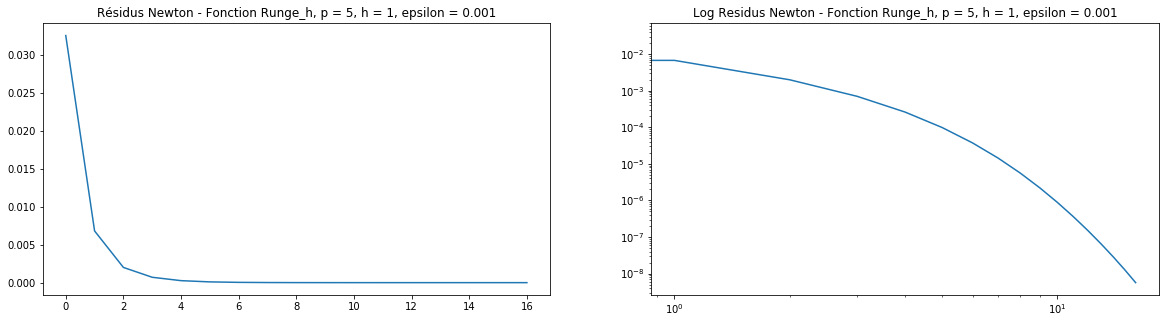

[0.1520124578693119, 0.06297627544438049, 0.027217934867005314, 0.012726289814810639, 0.006390413267458177, 0.0033890470908454666, 0.001872219583365073, 0.0010674402441832789, 0.0006246034503877714, 0.00037397571606317866, 0.000228849756762192, 0.0001431207166157187, 9.150901811262907e-05, 5.9826064280685246e-05, 3.996693101402564e-05, 2.7238736332768293e-05, 1.8892124525622684e-05, 1.3296026357649915e-05, 9.467589885809886e-06, 6.802772384984009e-06, 4.921564109073272e-06, 3.5787722101411772e-06, 2.6121803816782426e-06, 1.91198318841434e-06, 1.4023808776516297e-06, 1.0302069413305294e-06, 7.57701427133492e-07, 5.577899613878682e-07, 4.1092091879388515e-07, 3.02900218638726e-07, 2.233827471590081e-07, 1.6480663547124225e-07, 1.216323758826077e-07, 8.979523504680742e-08, 6.630882317664575e-08, 4.897682339654544e-08, 3.618267996078969e-08, 2.6735782214879003e-08, 1.9758756031350807e-08, 1.4604756697053954e-08, 1.0796707852683631e-08, 7.982622389705706e-09]


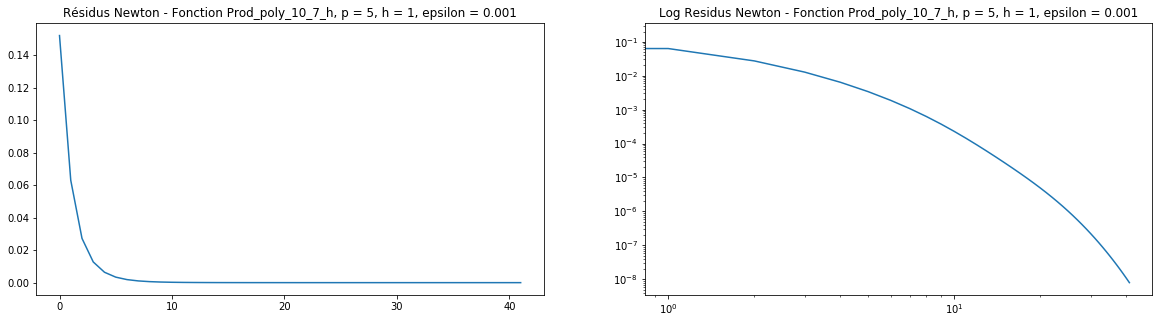

[0.08434479483637995, 0.04174026951950683, 0.023858387811253483, 0.014724630573305591, 0.0095457050357427, 0.006422775532457756, 0.0044706735043514205, 0.0032298638055506595, 0.002441905799147252, 0.0019503162537088047, 0.0016527842048587257, 0.0014787018382411133, 0.0013796061962822307, 0.0013240702846963397, 0.0012930632032044044, 0.001275649903488546, 0.0012657340759216673, 0.001259959058209761, 0.0012564789987459899, 0.001254274244143936, 0.0012527778935540897, 0.001251673043092028, 0.0012507822013055692, 0.0012500063951205406, 0.0012492912327112557, 0.0012486077478561296, 0.0012479414565261335, 0.0012472860410576738, 0.0012466396791687936, 0.0012460029048025837, 0.0012453773664561814, 0.0012447651160588501, 0.0012441682131822053, 0.0012435885167978787, 0.0012430275879465322, 0.0012424866570263772, 0.0012419666276372748, 0.0012414680999818396, 0.0012409914035972174, 0.0012405366333581326, 0.0012401036852609016, 0.001239692290078774, 0.0012393020439443285, 0.001238932435495641, 0.00

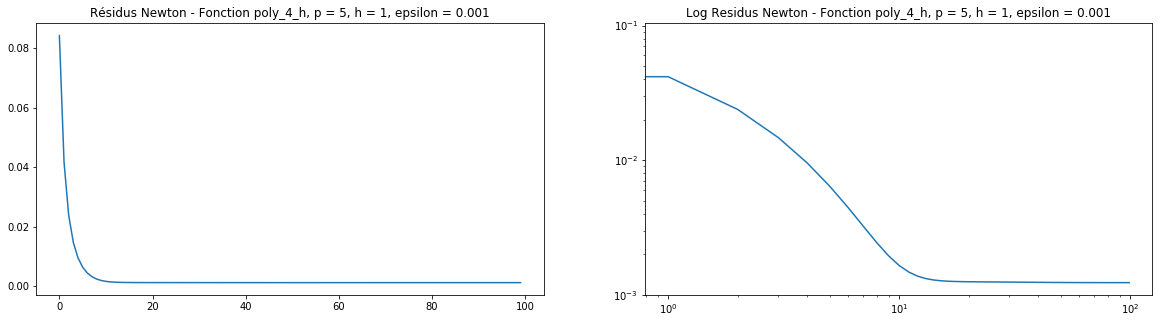

[0.001226016826313205, 4.935682629860261e-05, 2.4486381196892164e-06, 1.3465368065788044e-07, 7.964545590657125e-09]


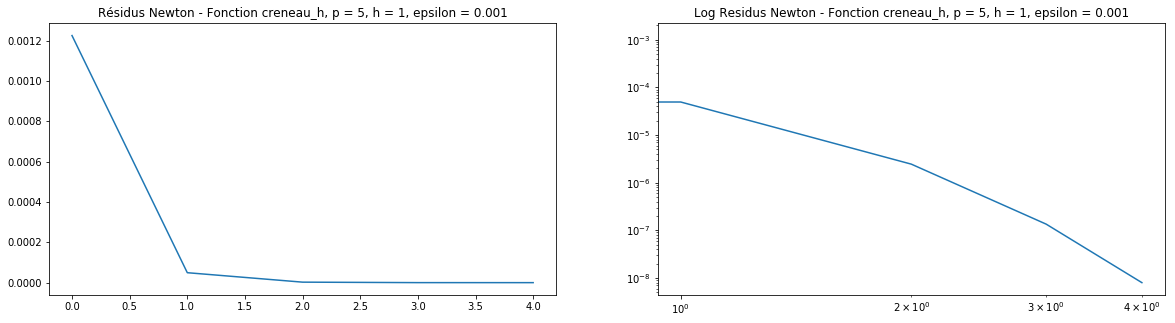

[0.00013214211240674304, 2.033289727923309e-06, 4.002083488863339e-08, 9.055683488045701e-10]


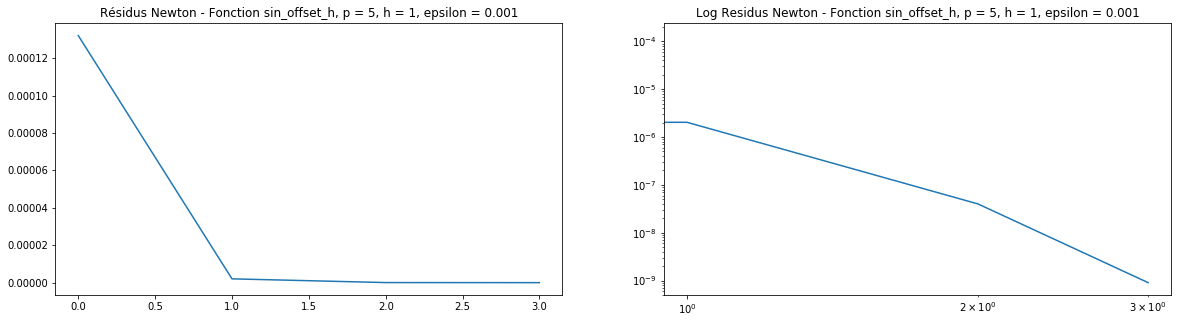

[0.19443232224763987, 0.1199921270334316, 0.08225832399028495, 0.057770291363365235, 0.04090575842577959, 0.029229427867655037, 0.02129644736672594, 0.01614017938261028, 0.013066963682752236, 0.011572889736413057, 0.010912456864734403, 0.010716794260678144, 0.010743148645478706, 0.01085778820804935, 0.01099553606887169, 0.011127729705348827, 0.011243476887983286, 0.011340021558868036, 0.011418092742776621, 0.01147974129077232, 0.011527366853146311, 0.011563300932304479, 0.011589645109519042, 0.011608223968056913, 0.011620587836528473, 0.011628035661892262, 0.011631644566748416, 0.011632300110128944, 0.01163072469549404, 0.011627503143016442, 0.011623105167854166, 0.011617904838473126, 0.011612197236985774, 0.011606212602289908, 0.011600128251241768, 0.011594078564958601, 0.011588163307805323, 0.011582454521768286, 0.011577002212238438, 0.011571839014754646, 0.011566984007171849, 0.011562445808657165, 0.011558225086172142, 0.01155431657073859, 0.011550710669741745, 0.011547394747645916,

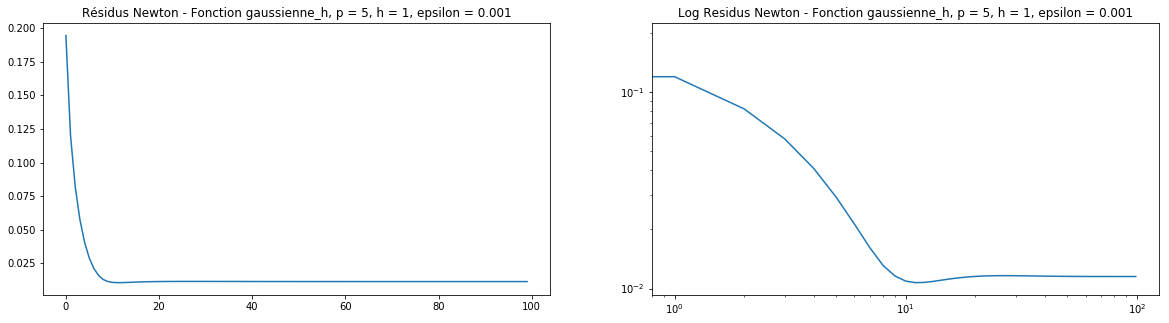

Polynome2p1.ipynb:31: RuntimeWarning: divide by zero encountered in double_scalars
  "# Polynome de degré $n = 2p + 1$ "


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


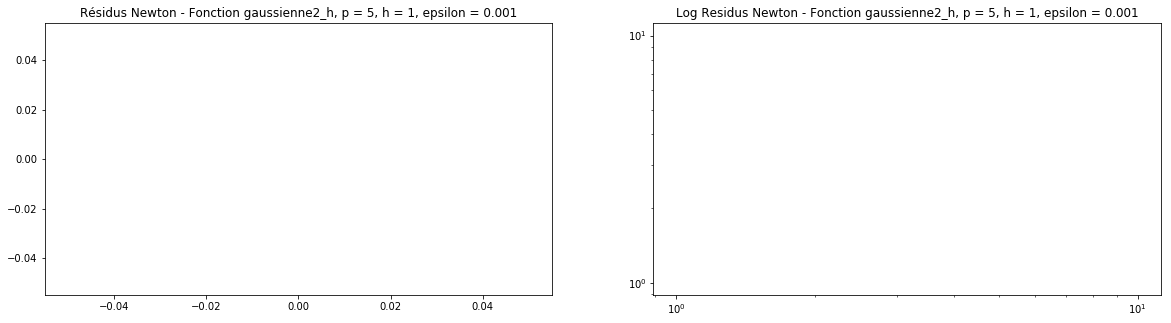

In [10]:
h = 1
epsilon=0.001
p = 5

for fonctions in fonctions_test : 
    px,fx,nb_iter = test_approx(p,fonctions,h,epsilon,0,0,1)

## Test avec une fonction + cte ou + droite

In [11]:
def test_approx_offset(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly.approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, Poly.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx,interp

In [12]:
def sin(x,h):
    x = x*h
    return np.sin(x+0.5)

def cst(x,h):
    c = 1
    if isinstance(x,np.ndarray)  :
        return c*np.ones(len(x))
    else :
        return c

def s_c(x,h):
    return sin(x,h) + cst(x,h)

def aff(x,h):
    x = x*h +1
    return 2*x

def pn4(x,h):
    x= x*h
    return x**4 + 1

def s_a(x,h):
    return sin(x,h) + aff(x,h) 

def s_4(x,h):
    return sin(x,h) + pn4(x,h) 

fonctions = [sin,cst,aff,pn4,s_c,s_a,s_4]

In [13]:
h = 1
p = 1
epsilon = 1e-9

Err_avec_S = np.zeros((len(fonctions),3))
Err_sans_S = np.zeros((len(fonctions),3))
Interp_points_S = []
Interp_points = []
for f in range(len(fonctions)) : 
    px,fx,interp = test_approx_offset(p,fonctions[f],h,epsilon,0,1)
    Interp_points_S += [interp] 
    Err_avec_S[f,0] = npl.norm(px-fx)
    Err_avec_S[f,1] = npl.norm(px-fx,np.inf)
    Err_avec_S[f,2] = Poly.trapezes(px-fx)
    px,fx,interp1 = test_approx_offset(p,fonctions[f],h,epsilon,0,0)
    Interp_points += [interp1] 
    Err_sans_S[f,0] = npl.norm(px-fx)
    Err_sans_S[f,1] = npl.norm(px-fx,np.inf)
    Err_sans_S[f,2] = Poly.trapezes(px-fx)
    
    
print('Erreurs avec calcul avec S')
print("Fonction     Norme 2        Nome inf        Trapezes ")
for i in range (len(fonctions)):
    name = str(fonctions[i]).split(' ')[1]
    print( '%s %16g  %14g  %14g' % (name, Err_avec_S[i,0], Err_avec_S[i,1], Err_avec_S[i,2]  ))
print("\n")    

#importance de wla séparation des noeuds ? 
print('Erreurs avec calcul sans S')
print("Fonction     Norme 2        Nome inf        Trapezes ")
for i in range (len(fonctions)):
    name = str(fonctions[i]).split(' ')[1]
    print( '%s %16g  %14g  %14g' % (name, Err_avec_S[i,0], Err_avec_S[i,1], Err_avec_S[i,2]  ))   
print("\n") 
    
#Etude de la derivabilité des points 
print("Fonction   Alpha_0_S        Alpha_0      Beta_p_S         Beta_p")
for i in range (len(fonctions)):
    name = str(fonctions[i]).split(' ')[1]
    print('%s %16g %14g %14g %14g' % (name,Interp_points_S[i][0],Interp_points[i][0],Interp_points_S[i][3], Interp_points[i][3])) 

[0.0002517463306407934, 2.7956254909170024e-06, 3.0171728159366833e-08, 3.249758560501508e-10]
[0.0002517463306407934, 2.7956254909170024e-06, 3.0171728159366833e-08, 3.249758560501508e-10]
[0.0]
[0.0]
[0.0001709234745771176, 1.3289430770356425e-06, 1.0187673423174932e-08, 7.802915449529427e-11]
[0.0001709234745771176, 1.3289430770356425e-06, 1.0187673423174932e-08, 7.802915449529427e-11]
[2.6965609279975685e-05, 7.560954012739455e-08, 2.3720970507565914e-10]
[2.6965609279975685e-05, 7.560954012739455e-08, 2.3720970507565914e-10]
[8.835452821624284e-06, 1.817680549826954e-08, 3.709574960624547e-11]
[8.835452821624284e-06, 1.817680549826954e-08, 3.709574960624547e-11]
[0.00018465297082769926, 1.5563123697766302e-06, 1.2878762334284126e-08, 1.0643804111100553e-10]
[0.00018465297082769926, 1.5563123697766302e-06, 1.2878762334284126e-08, 1.0643804111100553e-10]
[6.651437383726325e-05, 1.4169282503704215e-07, 3.049206330800091e-10]
[6.651437383726325e-05, 1.4169282503704215e-07, 3.049206330

# Test pour fonctions avec arguments

In [14]:
import Polynome2p1_avecArgumentsF as Poly_Arg

importing Jupyter notebook from Polynome2p1_avecArgumentsF.ipynb


In [15]:
def test_approx(p,f,h,argf,epsilon,affichage=None,s=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly_Arg.approxh(x,p,f,h,argf,epsilon,s=s)


    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,argf,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,argf,interp[p+1:],interp,epsilon)
    
    fx = f(x,h,*argf) 
    
    if affichage != None or affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h,*argf),'ob')
        plt.plot(interp, Poly_Arg.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+", l = "+str(*argf))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+", l ="+str(*argf)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+", l ="+str(*argf)+".png", format='png')
        plt.show()
    
    return px,fx,nb_iter

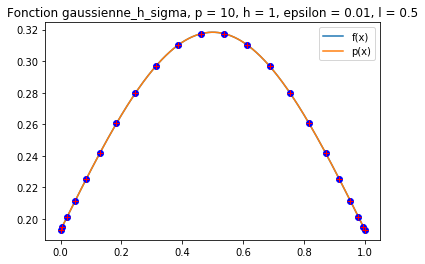

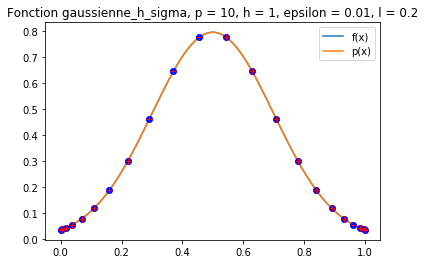

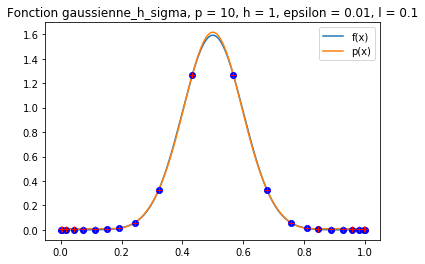

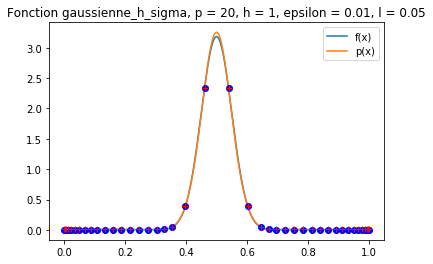

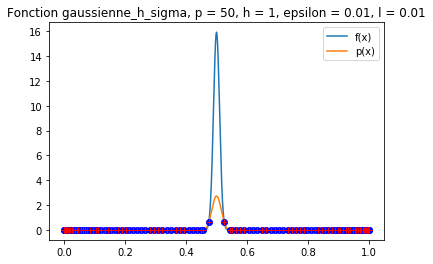

In [17]:
h = 1
p = [10,10,10,20,50]
epsilon=0.01
l = [[1/2],[1/5],[1/10],[1/20],[1/100]]
fonctions = FT.fonctions("Avec Arg")
Err = np.zeros((2,len(l)))

for i in range(len(l)):
    px,fx,nb_iter = test_approx(p[i],fonctions[0],h,l[i],epsilon,1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
#plt.plot(Err[0,:],label="Norme 2")
#plt.plot(Err[1,:],label="Norme inf")
#plt.legend()

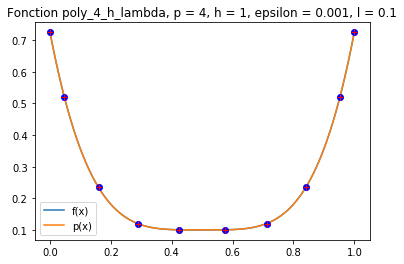

Nb iter :  19


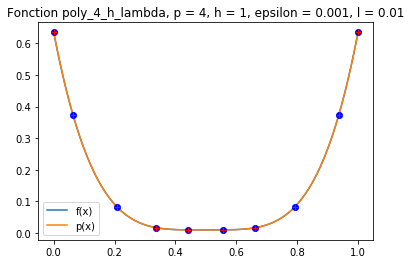

Nb iter :  47


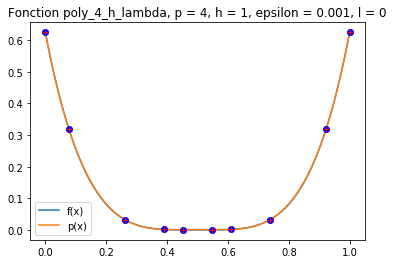

Nb iter :  500


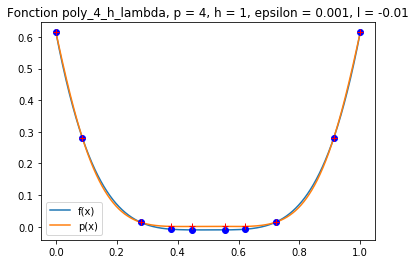

Nb iter :  500


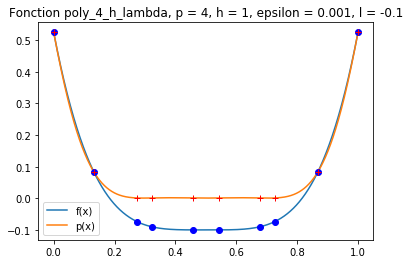

Nb iter :  500


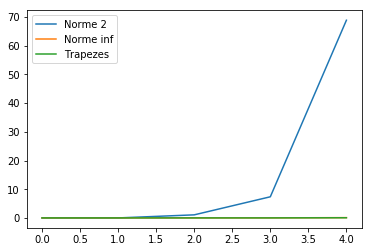

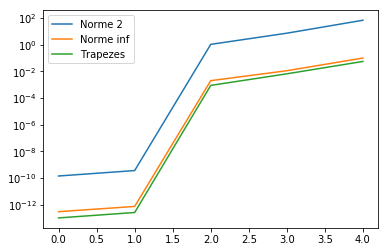

In [18]:
h = 1
p = 4
epsilon=1e-3
l = [[0.1],[0.01],[0],[-0.01],[-0.1]]
fonctions = FT.fonctions("Avec Arg")
Err = np.zeros((3,len(l)))

for i in range(len(l)):
    px,fx,nb_iter = test_approx(p,fonctions[1],h,l[i],epsilon,1,1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = Poly_Arg.trapezes(px-fx)
    print("Nb iter : ", nb_iter)
    

plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.plot(Err[2,:],label="Trapezes")
plt.legend()
plt.show()
plt.semilogy(Err[0,:],label="Norme 2")
plt.semilogy(Err[1,:],label="Norme inf")
plt.semilogy(Err[2,:],label="Trapezes")
plt.legend()


Remarque : par rapport au papier diff pour le n=9, lambda = -0.1